# Protein Structure

In [2]:
import numpy as np
data = np.loadtxt('../Data/1hmp_mmtk.txt')

# showing just the first ten rows
data[:10,:]

array([[ -92.926842,   12.941312],
       [  65.796807, -162.229709],
       [ -81.132082,  121.413022],
       [ -85.523806,  137.173724],
       [-124.988754,   85.242472],
       [ -43.117225,  147.113709],
       [ -48.307914,  -29.941388],
       [ -88.163884,   -2.348568],
       [ -52.848368,  130.047635],
       [ -93.401285,   -4.973523]])

### Question: 
How many $\text{C}_\alpha$ atoms are there in this structure?

In [3]:
len(data)

419

---

### Task: Summarise the data

In [4]:
phi = data[:,0]
psi = data[:,1]

$\phi$:

In [5]:
phi_mean = np.mean(phi)
print('mean:', phi_mean)

mean: -76.66391544868735


In [6]:
phi_median = np.median(phi)
print('median:', phi_median)

median: -82.172016


In [7]:
phi_std = np.std(phi)
print('sd:', phi_std)

sd: 55.32604155041411


$\psi$:

In [8]:
psi_mean = np.mean(psi)
print('mean:', psi_mean)

mean: 40.277060840095466


In [9]:
psi_median = np.median(psi)
print('median', psi_median)

median 9.247443


In [10]:
psi_std = np.std(psi)
print('sd:', psi_std)

sd: 90.67835602080288


---

### Task: Visualise the data


In [11]:
import matplotlib.pyplot as plt

We could attempt to compare distributions with a box plot:

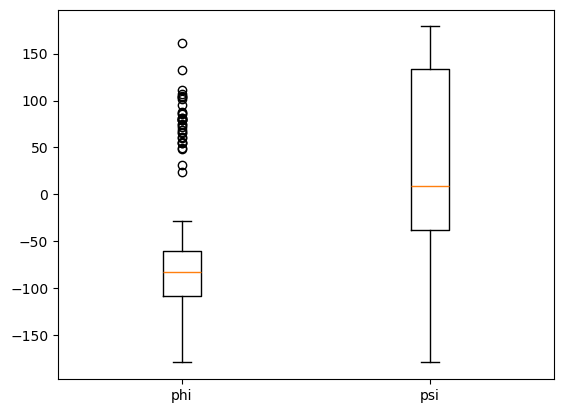

In [12]:
fig, axs = plt.subplots(1,1)
axs.boxplot(data)
axs.set_xticklabels(['phi','psi'])
plt.show()

but in fact this is quite misleading, as the histograms below show.

$\phi$:

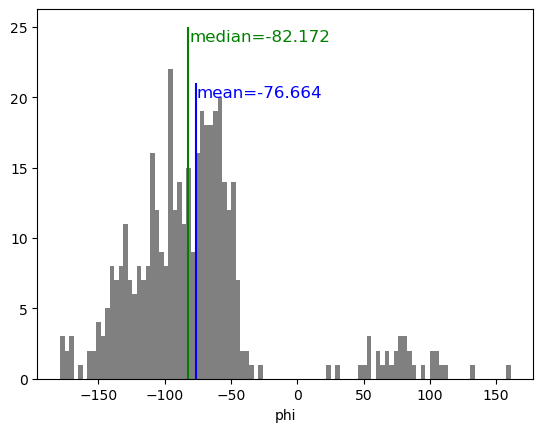

In [13]:
plt.hist(phi,bins=100,color='gray')
plt.xlabel('phi')
plt.vlines( phi_mean, 0, 21, colors='blue' )
plt.text( phi_mean + 1, 20, 'mean=' + str(np.round(phi_mean,3)), color='blue', fontsize='large')
plt.vlines( phi_median, 0, 25, colors='green' )
plt.text( phi_median + 1, 24, 'median=' + str(np.round(phi_median,3)), color='green', fontsize='large')
plt.show()

The mean is not really useful for a skewed distribution, but the median is a reasonable representative point for most of the data here. The relatively small number of positive values have not drastically affected the position of the median:

In [14]:
np.median(phi[(phi < 0)])

np.float64(-85.7109445)

$\psi$:

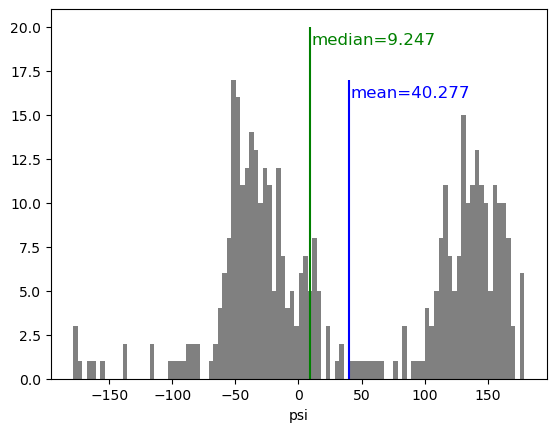

In [15]:
plt.hist(psi,bins=100,color='gray')
plt.xlabel('psi')
plt.vlines( psi_mean, 0, 17, colors='blue' )
plt.text( psi_mean + 1, 16, 'mean=' + str(np.round(psi_mean,3)), color='blue', fontsize='large')
plt.vlines( psi_median, 0, 20, colors='green' )
plt.text( psi_median + 1, 19, 'median=' + str(np.round(psi_median,3)), color='green', fontsize='large')
plt.show()

In this bimodal distribution, neither the mean nor the median are useful summary statistics. We will need to model the data in a way that captures this more complex shape.

---

### Task: Joint distribution


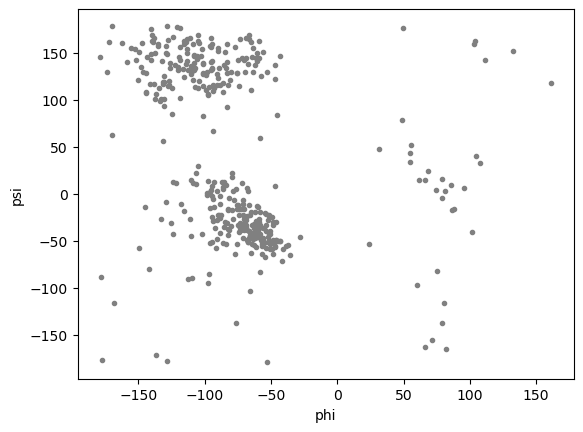

In [16]:
plt.scatter(phi, psi, color='gray', marker='.')
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()

### Task: Gaussian mixture model


In [17]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=0).fit(data)

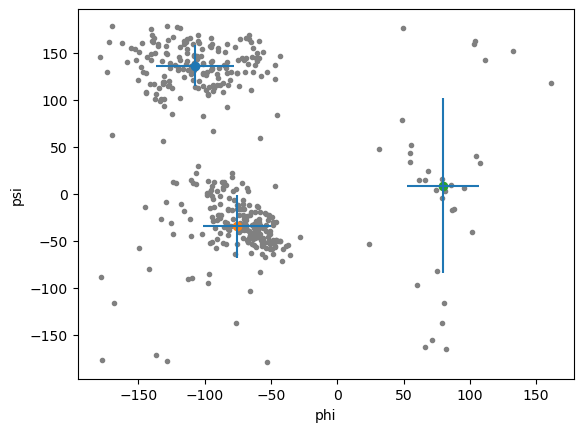

In [18]:
plt.scatter(phi,psi, color='gray', marker='.')
plt.xlabel('phi')
plt.ylabel('psi')
for i in range(len(gmm.means_)):
    phi_bar = gmm.means_[i,0]
    psi_bar = gmm.means_[i,1]
    sd = np.sqrt(gmm.covariances_)
    plt.plot(phi_bar,psi_bar, marker='o')
    plt.hlines(psi_bar,phi_bar-sd[i,0],phi_bar+sd[i,0])
    plt.vlines(phi_bar,psi_bar-sd[i,1],psi_bar+sd[i,1])

plt.show()

### Question:
How could we improve on this model?

The top-left component seems quite well represented by the model, but the others less so. We can improve the model by changing the `covariance_type` to capture the dependence between $\phi$ and $\psi$ - e.g. for the bottom-left component the two variables seem to be negatively correlated.

Additionally, we could consider adding more Gaussian components, to more accurately capture the distribution on the right side of the plot.

---